# Projet MACHINE LEARNING — BAKOUAN Y. Jean De Dieu Eben-Ezer

<div style="font-size: 0.9em;">Ce projet vise à prédire la teneur en or à partir de données géologiques en utilisant des modèles de machine learning. Il inclut une analyse exploratoire des données (EDA), un prétraitement rigoureux, l'entraînement de plusieurs modèles de régression, et une comparaison détaillée de leurs performances pour identifier le modèle le plus efficace.</div>

## Importation des bibliothèques

<div style="font-size: 0.9em;">Cette section importe les bibliothèques essentielles pour l'analyse, la visualisation et l'entraînement des modèles. Cela inclut pandas pour la manipulation des données, matplotlib et seaborn pour les visualisations, ainsi que scikit-learn et xgboost pour les algorithmes de machine learning.</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

/home/bakouan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Chargement des données

<div style="font-size: 0.9em;">Les données géologiques, composées de 5000 lignes, sont chargées pour examiner leur structure. Cette étape permet d'identifier les types de variables, de détecter les valeurs manquantes et de calculer des statistiques descriptives pour mieux comprendre le dataset.</div>

In [2]:
df = pd.read_csv('~/Bureau/Data/donnees_minieres_5000_lignes.csv')
print("Dimensions :", df.shape)
print("\nTypes de données :\n", df.dtypes)
print("\nValeurs manquantes :\n", df.isnull().sum())
print("\nStatistiques descriptives :\n", df.describe())

Dimensions : (5000, 7)

Types de données :
 profondeur         float64
type_roche          object
ph                 float64
conductivite       float64
distance_faille    float64
humidite           float64
teneur_or          float64
dtype: object

Valeurs manquantes :
 profondeur         0
type_roche         0
ph                 0
conductivite       0
distance_faille    0
humidite           0
teneur_or          0
dtype: int64

Statistiques descriptives :
         profondeur           ph  conductivite  distance_faille     humidite  \
count  5000.000000  5000.000000   5000.000000      5000.000000  5000.000000   
mean    255.574166     6.782312    259.784634       491.847492    19.939536   
std     141.320490     1.291902    141.368228       284.941179     8.675984   
min      10.090000     4.500000     10.020000         0.110000     5.000000   
25%     137.277500     5.690000    137.710000       246.527500    12.367500   
50%     256.580000     6.800000    262.290000       493.365000    

## Distributions des variables

<div style="font-size: 0.9em;">Les histogrammes générés ici montrent la distribution des variables numériques comme la profondeur ou la teneur en or. Cette visualisation aide à détecter les asymétries, les valeurs aberrantes ou les distributions non normales qui pourraient affecter les modèles.</div>

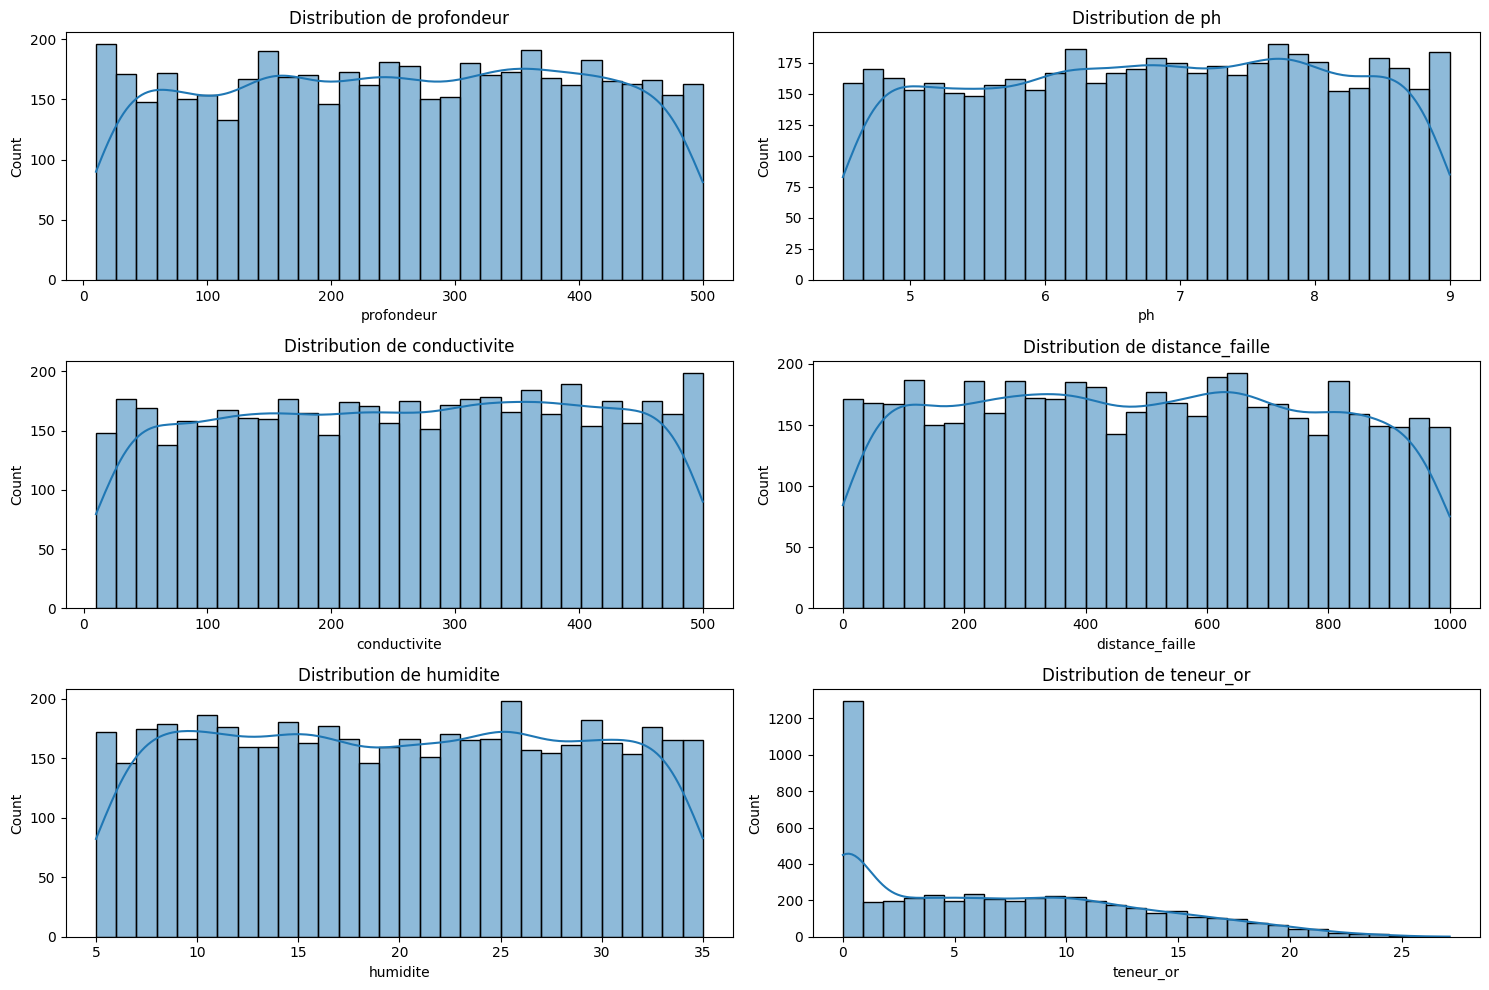

In [3]:
plt.figure(figsize=(15, 10))
numeriques = ['profondeur', 'ph', 'conductivite', 'distance_faille', 'humidite', 'teneur_or']
for i, col in enumerate(numeriques):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()

## Corrélation entre les variables

<div style="font-size: 0.9em;">La matrice de corrélation visualise les relations linéaires entre les variables. Elle permet d'identifier les variables fortement corrélées avec la teneur en or et de détecter d'éventuelles multicolinéarités entre variables explicatives.</div>

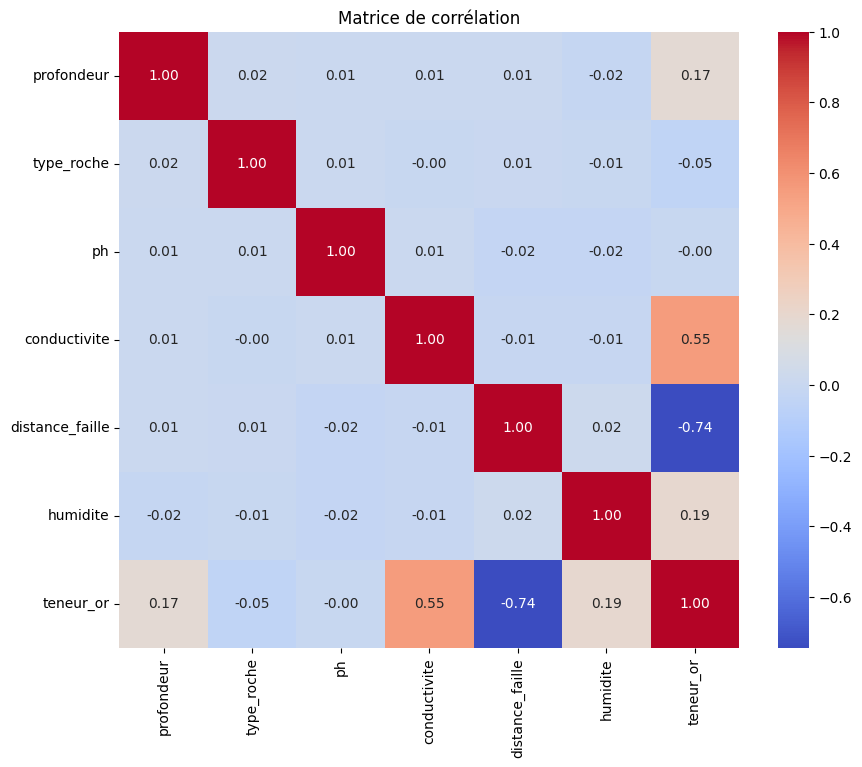

In [4]:
df_encoded = df.copy()
df_encoded['type_roche'] = LabelEncoder().fit_transform(df_encoded['type_roche'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

## Boxplots (valeurs extrêmes)

<div style="font-size: 0.9em;">Les boxplots sont utilisés pour identifier les valeurs aberrantes dans les variables numériques. Ces outliers peuvent influencer négativement les modèles sensibles, comme la régression linéaire, et nécessitent une attention particulière.</div>

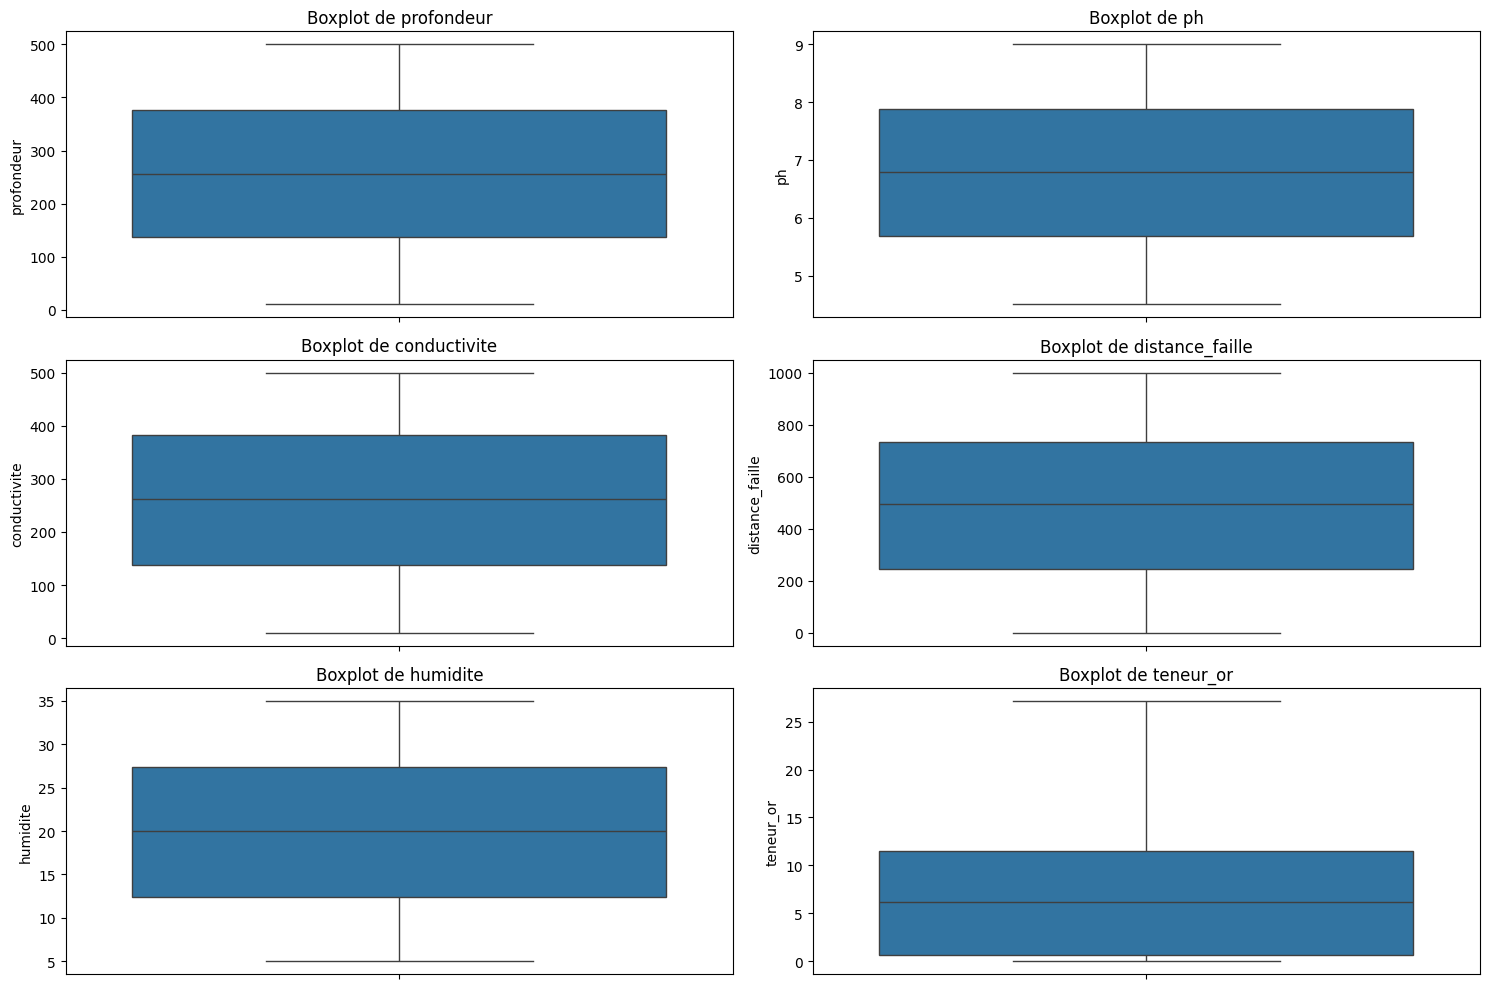

In [5]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeriques):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

## Relations entre variables et types de roches

<div style="font-size: 0.9em;">Le pairplot explore les relations bivariées entre les variables numériques, tandis que le barplot montre la teneur moyenne en or par type de roche, révélant l'impact des catégories de roches sur la variable cible.</div>

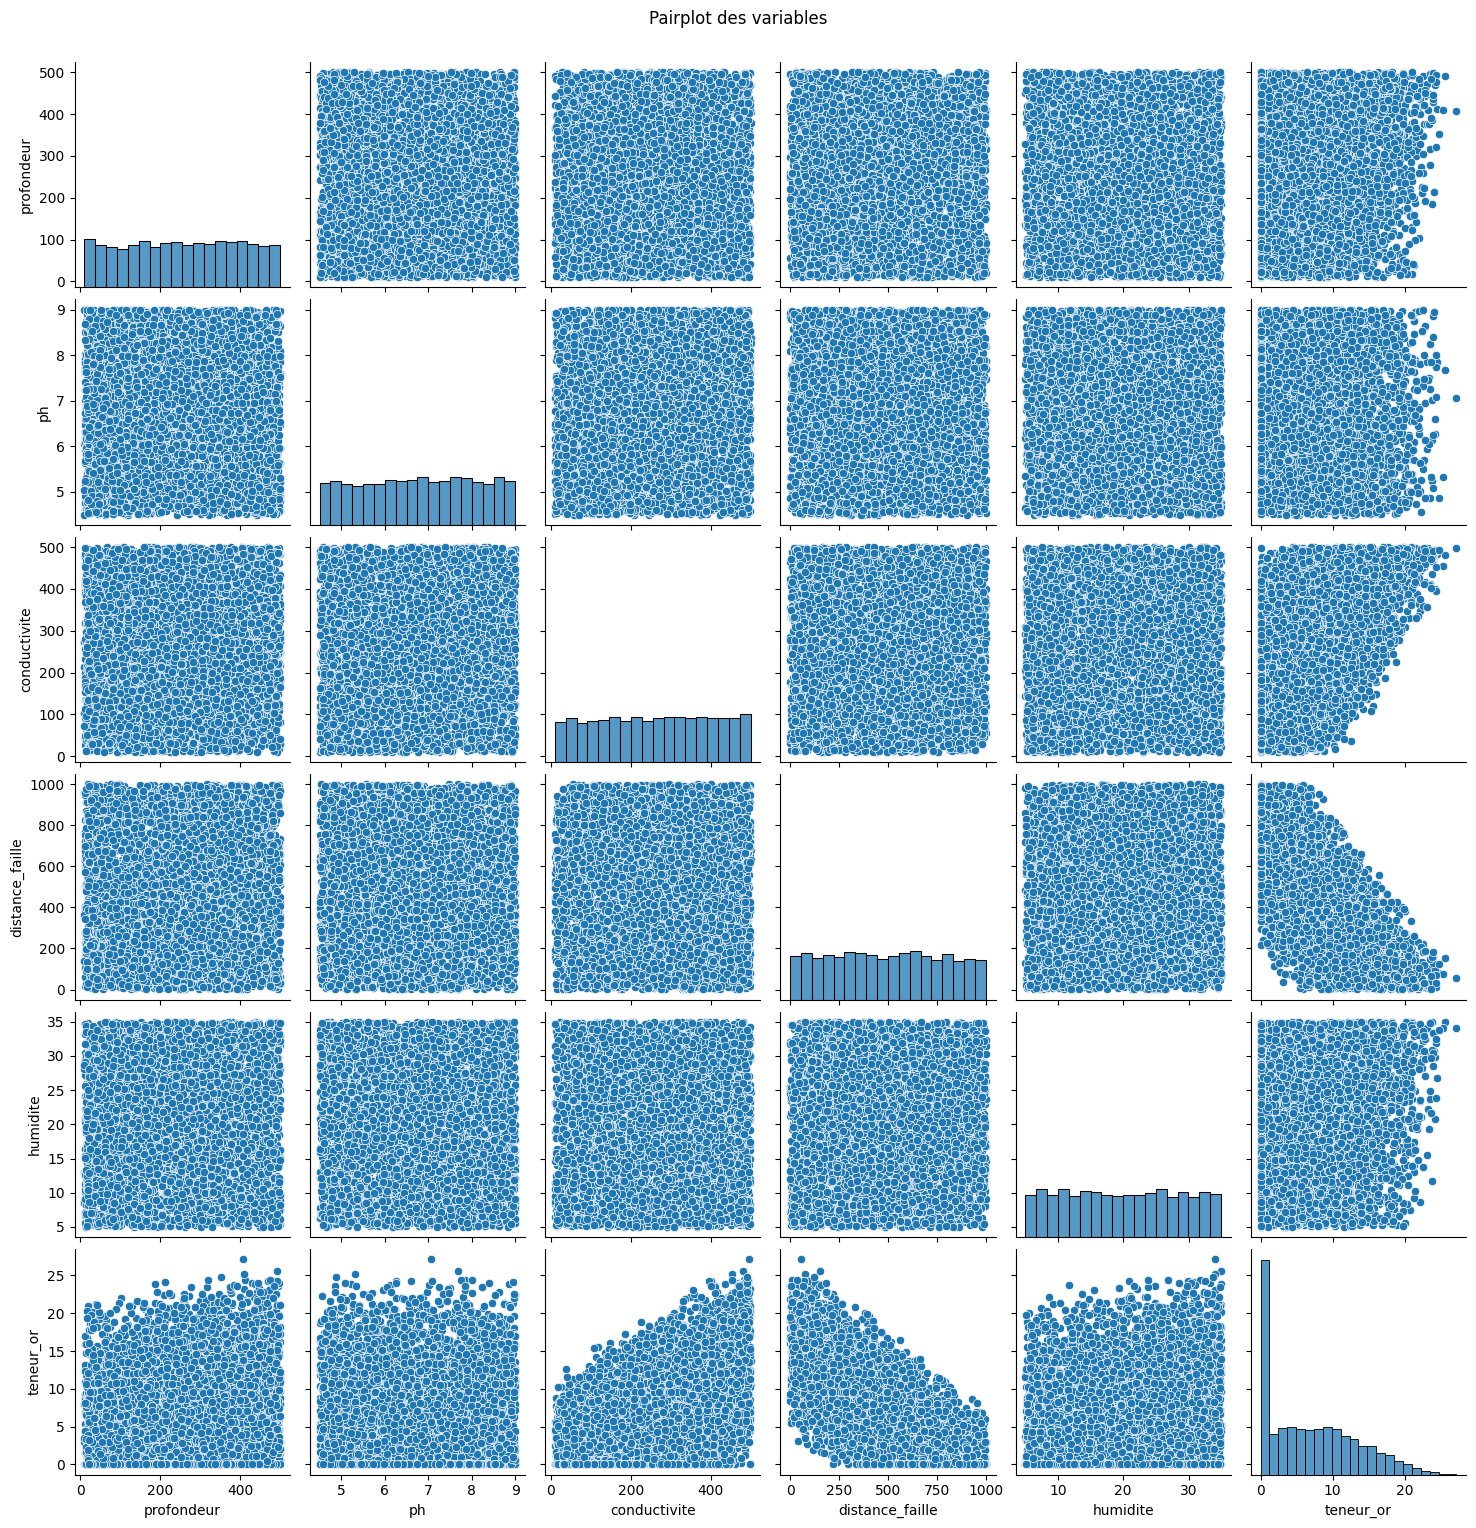

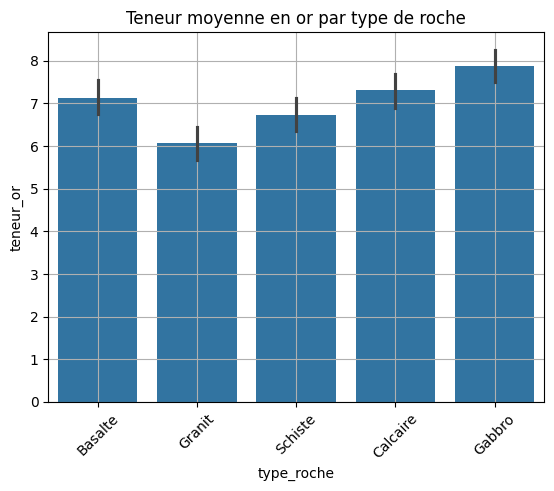

In [6]:
sns.pairplot(df[numeriques])
plt.suptitle("Pairplot des variables", y=1.02)
plt.show()

sns.barplot(data=df, x='type_roche', y='teneur_or', estimator='mean')
plt.title("Teneur moyenne en or par type de roche")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Préparation des données

<div style="font-size: 0.9em;">La variable catégorielle 'type_roche' est encodée numériquement. Les données sont divisées en ensembles d'entraînement et de test, et les variables explicatives sont standardisées pour garantir une échelle cohérente pour les modèles sensibles.</div>

In [7]:
df["type_roche"] = LabelEncoder().fit_transform(df["type_roche"])
X = df.drop("teneur_or", axis=1)
y = df["teneur_or"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Entraînement et évaluation des modèles

<div style="font-size: 0.9em;">Quatre modèles de régression sont entraînés : Régression Linéaire, Random Forest, MLP Regressor et XGBoost. Chaque modèle est évalué avec les métriques MAE, RMSE et R² pour comparer leurs performances et identifier le plus adapté.</div>

### Régression Linéaire

<div style="font-size: 0.9em;">Ce modèle simple suppose une relation linéaire entre les variables explicatives et la teneur en or. Il est rapide à entraîner mais peut être limité par des relations non linéaires dans les données.</div>

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Régression Linéaire")
print("MAE  :", round(mean_absolute_error(y_test, y_pred_lr), 2))
print("RMSE :", round(mean_squared_error(y_test, y_pred_lr) ** 0.5, 2))
print("R²   :", round(r2_score(y_test, y_pred_lr), 4))

Régression Linéaire
MAE  : 1.27
RMSE : 1.68
R²   : 0.9272


### Random Forest

<div style="font-size: 0.9em;">Ce modèle d'ensemble utilise plusieurs arbres de décision pour capturer des relations complexes. Il est robuste aux valeurs aberrantes et ne nécessite pas de standardisation des données.</div>

In [9]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print("MAE  :", round(mean_absolute_error(y_test, y_pred_rf), 2))
print("RMSE :", round(mean_squared_error(y_test, y_pred_rf) ** 0.5, 2))
print("R²   :", round(r2_score(y_test, y_pred_rf), 4))

Random Forest
MAE  : 0.64
RMSE : 0.87
R²   : 0.9802


### MLP Regressor

<div style="font-size: 0.9em;">Ce réseau de neurones artificiels avec plusieurs couches cachées est capable de modéliser des relations non linéaires complexes. Il nécessite une standardisation des données pour des performances optimales.</div>

In [10]:
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)
print("MLP Regressor")
print("MAE  :", round(mean_absolute_error(y_test, y_pred_mlp), 2))
print("RMSE :", round(mean_squared_error(y_test, y_pred_mlp) ** 0.5, 2))
print("R²   :", round(r2_score(y_test, y_pred_mlp), 4))

MLP Regressor
MAE  : 0.22
RMSE : 0.28
R²   : 0.9979


### XGBoost

<div style="font-size: 0.9em;">XGBoost est un modèle de boosting basé sur des arbres, connu pour sa précision et sa robustesse. Il est particulièrement efficace pour les données tabulaires et gère bien les relations non linéaires.</div>

In [11]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
print("XGBoost")
print("MAE  :", round(mean_absolute_error(y_test, y_pred_xgb), 2))
print("RMSE :", round(mean_squared_error(y_test, y_pred_xgb) ** 0.5, 2))
print("R²   :", round(r2_score(y_test, y_pred_xgb), 4))

XGBoost
MAE  : 0.52
RMSE : 0.65
R²   : 0.989
